# Credit Card Fraud Detection

Hi! Mario Here! In this project I'll predict whether a credit card transaction is fraudulent or not. The dataset was obtained from Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data) and consist of 30 features plus the class label.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, they cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise (this information appears on the URL above).

Let's first import some packages and load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Now let's describe the data, and look if it have missing values, and if it is an imbalanced problem or not.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The describe command doesn't tell us much, as most features aren´t intuitive. Most of them have mean 0. The mean time is about 94,814 seconds since the first transaction, and the mean amount is about $88.35. They have a high standard deviation.

In [130]:
# Lets drop duplicates
df.drop_duplicates(inplace = True)

df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

As we can see, the problem is really imbalanced! 473 fraudulent transactions to 283,253 normal ones. So, for this problem, I'll use an ensemble model such as Random Forest, and the Area Under the Precision-Recall Curve as the main evaluation metric, because both tend to work well in the imbalanced case, unlike others. Besides, the PR AUC puts priority on the positive class, unlike the ROC AUC, which would be a little biased.

Let's see if we find any differences for the Amount feature. Also, let's drop the Time feature, as it isn't really useful.

In [146]:
df = df.drop('Time', axis = 1)
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


As we can see, fraudulent transactions tend to have larger amounts of money involved, which is someone might expect, although they have a high standard deviation.

Let's study the correlations between variables. V1 to V28 are the components of a PCA, so they will be uncorrelated between them. Let's see what happens between the others.

<Axes: >

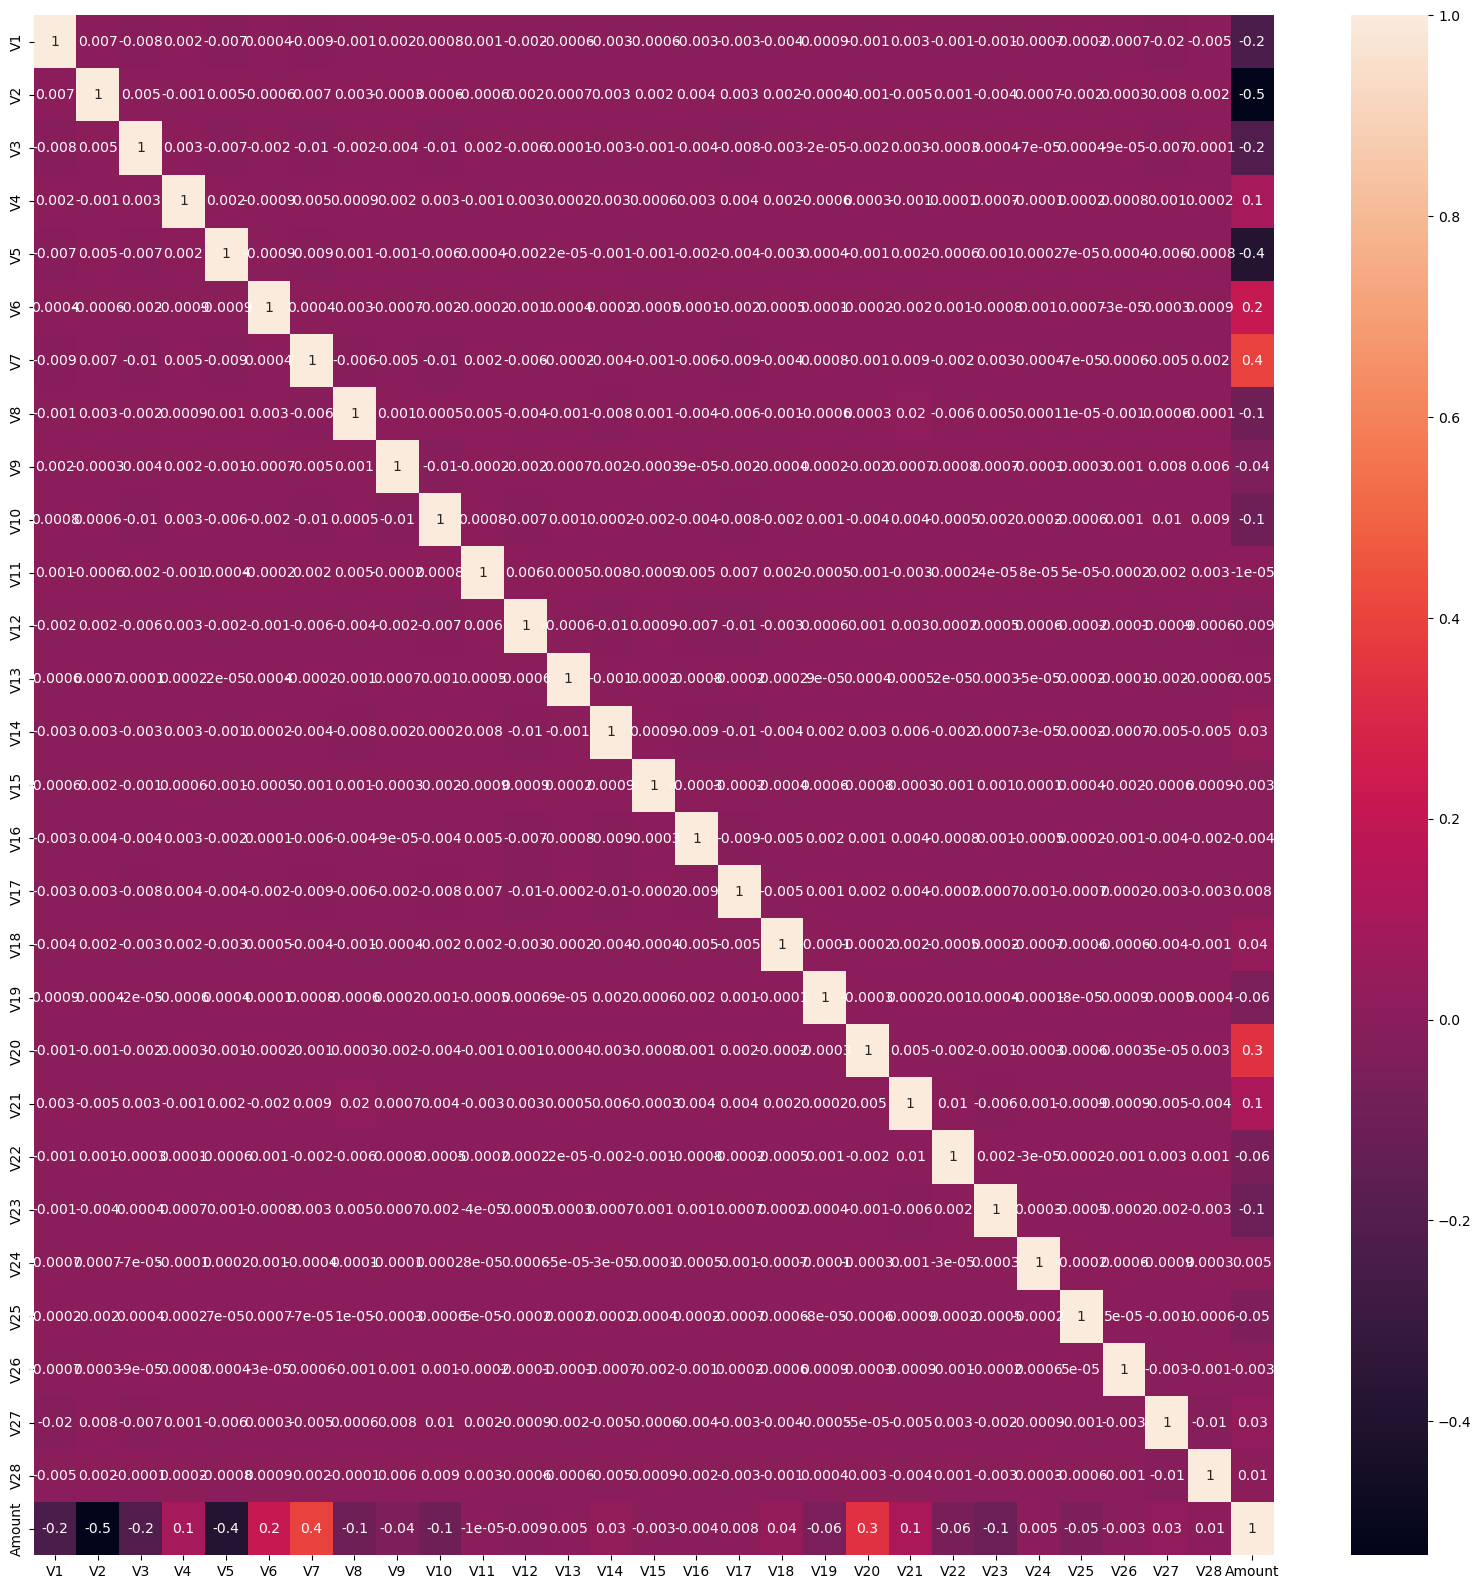

In [132]:
plt.figure(figsize = (20,20))
sns.heatmap(df.drop('Class', axis = 1).corr(), annot = True, fmt = '.1g')

We can see that the correlation between amount and the amount is in most cases close to 0, with the exception of V2, V5, V7 and V20. However, they aren't that high, so the strategy will be to run a default Random Forest and take the most important features. As the imbalance is so high, we'll probably find an extreme overfitting. I don't have the computational power to perform oversampling, and undersampling would cause an extreme reduction of the dataset. 

Due to the lack of computational power, I'll just use a stratified train-test split instead of a cross-validation or a grid search with cross validation. However, once I have the best features, I'll try some of them and change some hyperparameters such as maximum depth and minimum samples per leaf. I'll save you from reading all that and just use the best I found.

In [133]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0, stratify = y)

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 0, n_estimators = 100)

rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)


In [136]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, average_precision_score

print('Confusion matrix train set: \n', confusion_matrix(y_train, y_pred_train))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_pred))

print('Classification report train set: \n', classification_report(y_train, y_pred_train))
print('Classification report test set: \n', classification_report(y_test, y_pred))

Confusion matrix train set: 
 [[198277      0]
 [     0    331]]
Confusion matrix test set: 
 [[84973     3]
 [   27   115]]
Classification report train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       1.00      1.00      1.00       331

    accuracy                           1.00    198608
   macro avg       1.00      1.00      1.00    198608
weighted avg       1.00      1.00      1.00    198608

Classification report test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.97      0.81      0.88       142

    accuracy                           1.00     85118
   macro avg       0.99      0.90      0.94     85118
weighted avg       1.00      1.00      1.00     85118



In [137]:
probs_train = rf.predict_proba(X_train)[:, 1]
probs_test = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, probs_train)
pr_auc_train = auc(recall, precision)
print('Precision-recall AUC training: ', pr_auc_train)

Precision-recall AUC training:  1.0


In [138]:
precision, recall, thresholds = precision_recall_curve(y_test, probs_test)
pr_auc_test = auc(recall, precision)
print('Precision-recall AUC test: ', pr_auc_test)

Precision-recall AUC test:  0.8642513242886769


As I thought, we have an extreme overfitting with the default Random Forest model. The training set has a score of 1 in every metric that is shown, and is reduced on the test set. Below we see the feature importances, where amount is not significant.

In [139]:
importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importances}).sort_values(
    'Gini Importance', ascending=False).reset_index()

del feature_imp_df['index']

print(feature_imp_df)

   Feature  Gini Importance
0      V17         0.154898
1      V14         0.142438
2      V12         0.119413
3      V10         0.069847
4      V11         0.064359
5      V16         0.048979
6       V9         0.040910
7      V18         0.038542
8       V4         0.035603
9       V7         0.029436
10     V26         0.020304
11     V21         0.019294
12     V27         0.016614
13      V6         0.016539
14      V3         0.015535
15      V1         0.014687
16     V22         0.013801
17      V2         0.013509
18      V5         0.012824
19     V19         0.012675
20  Amount         0.012526
21     V20         0.012263
22     V15         0.012009
23     V13         0.011739
24     V28         0.011614
25     V25         0.010820
26      V8         0.010614
27     V23         0.009364
28     V24         0.008844


For this part, I tried using from the 6 to 10  best features, and came to the conclusion that 8 is the best number. Also, for a random forest, I tried from 3 to 7 maximum depth and from 1 to 100 min samples leaf. The best values are 5 and 1, respectively.

In [140]:
X2 = X[feature_imp_df['Feature'].iloc[0:8]]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state = 0, stratify = y)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 0, n_estimators = 100, max_depth = 5)

rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, average_precision_score

print('Confusion matrix train set for 8 best features: \n', confusion_matrix(y_train, y_pred_train))
print('Confusion matrix test set for 8 best features: \n', confusion_matrix(y_test, y_pred))

print('Classification report train set for 8 best features: \n', classification_report(y_train, y_pred_train))
print('Classification report test set for 8 best features: \n', classification_report(y_test, y_pred))

Confusion matrix train set for 8 best features: 
 [[198253     24]
 [    77    254]]
Confusion matrix test set for 8 best features: 
 [[84970     6]
 [   33   109]]
Classification report train set for 8 best features: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.91      0.77      0.83       331

    accuracy                           1.00    198608
   macro avg       0.96      0.88      0.92    198608
weighted avg       1.00      1.00      1.00    198608

Classification report test set for 8 best features: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.95      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.97      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [143]:
probs_train = rf.predict_proba(X_train)[:, 1]
probs_test = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, probs_train)
pr_auc_train = auc(recall, precision)
print('Precision-recall AUC training for 8 best features: ', pr_auc_train)

Precision-recall AUC training for 8 best features:  0.8260279286519189


In [144]:
precision, recall, thresholds = precision_recall_curve(y_test, probs_test)
pr_auc_test = auc(recall, precision)
print('Precision-recall AUC test for 8 best features: ', pr_auc_test)

Precision-recall AUC test for 8 best features:  0.8359588581066301


As we can see, the usual metrics indicate overfitting, but the target metric, which is PR AUC, indicates a better performance with the test set, of about 1 percent point.